In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Choose a Kinematic Solver Type

Import CSV file as DataFrame. Drop the incomplete first loop with index -1

In [85]:
joint_positions_speed = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230123_094832')
joint_positions_distance = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230123_090327')
joint_positions_manipulator1 = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230123_080501')
joint_positions_manipulator2 = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230120_160632')

l_of_jp = [joint_positions_speed, joint_positions_distance, joint_positions_manipulator1, joint_positions_manipulator2]

for jp in l_of_jp:
    jp.drop(jp.loc[jp['loop_count']==-1].index, inplace=True)

## IK solver type: Speed

In [86]:
s_mean = joint_positions_speed[joint_positions_speed.columns[3:]].mean()
s_std = joint_positions_speed[joint_positions_speed.columns[3:]].std()

## IK solver type: Distance

In [87]:
d_mean = joint_positions_distance[joint_positions_distance.columns[3:]].mean()
d_std = joint_positions_distance[joint_positions_distance.columns[3:]].std()

## IK solver type: Manipulator1

In [88]:
(joint_positions_manipulator1['loop_count'].min(), joint_positions_manipulator1['loop_count'].max())

(2, 165)

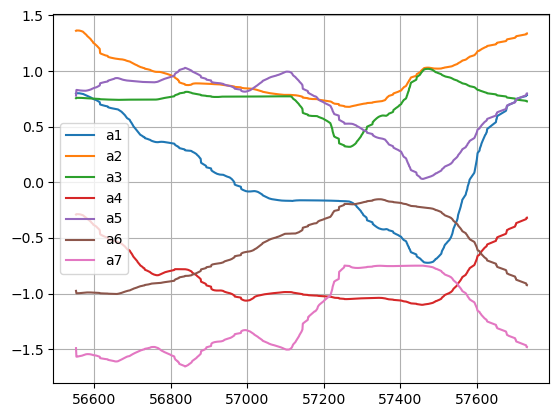

In [89]:
fig, ax = plt.subplots()
for joint in joint_positions_manipulator1.columns[3:]:
    ax.plot(joint_positions_manipulator1[joint].loc[joint_positions_manipulator1['loop_count']==35], label=joint)
#ax.plot(joint_positions['a1'], label='a1')
ax.legend()
ax.grid()

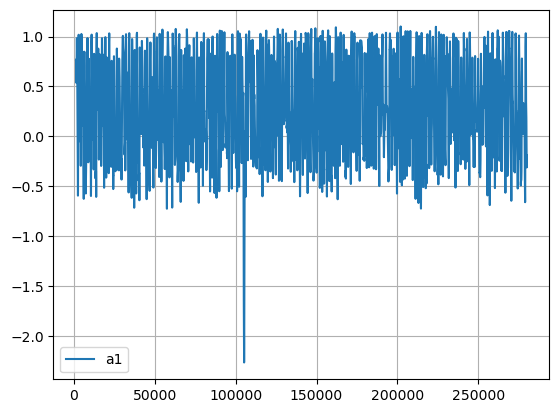

In [90]:
fig, ax = plt.subplots()
ax.plot(joint_positions_manipulator1['a1'], label='a1')
ax.legend()
ax.grid()

In [91]:
m1_mean = joint_positions_manipulator1[joint_positions_manipulator1.columns[3:]].mean()
m1_std = joint_positions_manipulator1[joint_positions_manipulator1.columns[3:]].std()

## IK solver type: Manipulator2

Range of the loops

In [92]:
(joint_positions_manipulator2['loop_count'].min(), joint_positions_manipulator2['loop_count'].max())

(61, 182)

Plot the joint angles

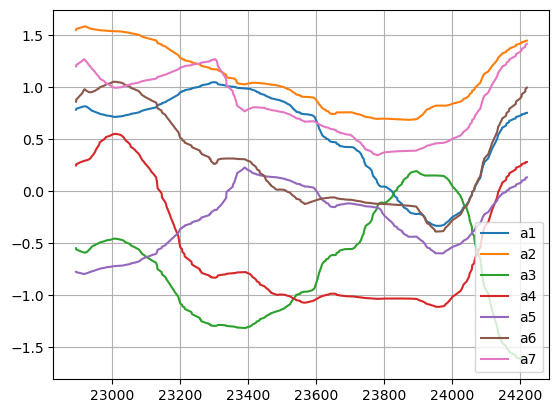

In [93]:
fig, ax = plt.subplots()
for joint in joint_positions_manipulator2.columns[3:]:
    ax.plot(joint_positions_manipulator2[joint].loc[joint_positions_manipulator2['loop_count']==75], label=joint)
#ax.plot(joint_positions['a1'], label='a1')
ax.legend()
ax.grid()

absolute values of joint angles

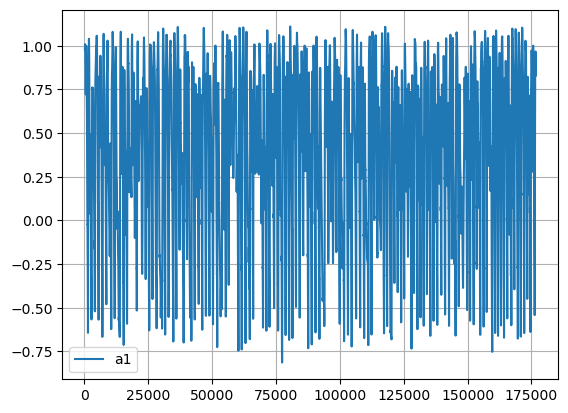

In [94]:
fig, ax = plt.subplots()
ax.plot(joint_positions_manipulator2['a1'], label='a1')
ax.legend()
ax.grid()

mean

In [95]:
m2_mean = joint_positions_manipulator2[joint_positions_manipulator2.columns[3:]].mean()
m2_std = joint_positions_manipulator2[joint_positions_manipulator2.columns[3:]].std()

## Results

In [96]:
r = {'speed_mean':s_mean, 'speed_std':s_std, 'distance_mean':d_mean, 'distance_std':d_std, 'manipulator1_mean':m1_mean, 'manipulator1_std':m1_std, 'manipulator2_mean':m2_mean, 'manipulator2_std':m2_std}
results = pd.concat(r, axis=1)
results

,speed_mean,speed_std,distance_mean,distance_std,manipulator1_mean,manipulator1_std,manipulator2_mean,manipulator2_std
a1,-0.393454,1.305677,0.061176,0.989919,0.301378,0.447856,0.395296,0.484671
a2,0.506344,1.047715,0.915152,0.760211,1.085121,0.278635,1.003355,0.224885
a3,0.150285,1.508087,0.453415,1.310912,-0.110943,0.671231,-0.189296,0.708768
a4,0.074533,0.845568,-0.248687,0.817918,-0.383849,0.693784,-0.685476,0.474235
a5,-0.162407,1.547136,-0.106131,1.298375,0.080124,0.605832,0.082773,0.594125
a6,0.035654,0.636868,0.051051,0.668554,0.051332,0.598569,-0.066305,0.498595
a7,-0.128475,1.437226,-0.165884,1.527451,0.039382,0.952229,0.081040,0.943457


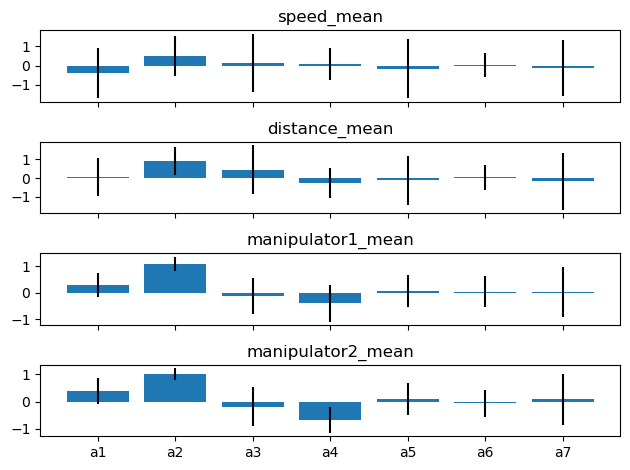

In [159]:
fix, axs = plt.subplots(4, sharex=True)
for plot, i in zip(range(4), range(0,7,2)):
    axs[plot].bar(range(7), results[results.columns[i]], yerr=results[results.columns[i+1]], tick_label=results.index )
    axs[plot].set_title(results.columns[i])

plt.tight_layout()

# Find the best route for a given Solver Type

## read csv data

In [182]:
joint_positions_manipulator1_long = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230123_105247')
joint_positions_manipulator1_long.drop(joint_positions_manipulator1_long.loc[joint_positions_manipulator1_long['loop_count']==-1].index, inplace=True)
joint_velocity_manipulator1_long = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/velocity_values_20230123_105247')
joint_velocity_manipulator1_long.drop(joint_velocity_manipulator1_long.loc[joint_velocity_manipulator1_long['loop_count']==-1].index, inplace=True)

In [378]:
joint_positions_manipulator2_long = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230123_152415')
joint_positions_manipulator2_long.drop(joint_positions_manipulator2_long.loc[joint_positions_manipulator2_long['loop_count']==-1].index, inplace=True)
joint_velocity_manipulator2_long = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/velocity_values_20230123_152415')
joint_velocity_manipulator2_long.drop(joint_velocity_manipulator2_long.loc[joint_velocity_manipulator2_long['loop_count']==-1].index, inplace=True)

In [650]:
jpm1_10 = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230124_103805')
jpm1_10.drop(jpm1_10.loc[jpm1_10['loop_count']==-1].index, inplace=True)
jvm1_10 = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/velocity_values_20230124_103805')
jvm1_10.drop(jvm1_10.loc[jvm1_10['loop_count']==-1].index, inplace=True)

In [829]:
jpm1_5 = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230125_075156')
jpm1_5.drop(jpm1_5.loc[jpm1_5['loop_count']==-1].index, inplace=True)
jvm1_5 = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/velocity_values_20230125_075156')
jvm1_5.drop(jvm1_5.loc[jvm1_5['loop_count']==-1].index, inplace=True)

## Additionals

In [844]:
def get_cycle_time(df, cycle_number):
    return (int(df.loc[df['loop_count']==cycle_number]['timestamp'].iloc[-1])-int(df.loc[df['loop_count']==cycle_number]['timestamp'].iloc[0]))/1000000

def get_initial_joint_position(df, cycle_number):
    return df.loc[(df['loop_count']==cycle_number, df.columns[3:])].iloc[0]

def get_final_joint_position(df, cycle_number):
    return df.loc[(df['loop_count']==cycle_number, df.columns[3:])].iloc[-1]

## Ansatz 1: Minimierung der absoluten Achsgeschwindigkeit

* Schleife über jeden Zyklus
* Berechnung der Summe der absoluten Achsgeschwindigkeiten
* Mittelwert und Std für jeden Zyklus

In [788]:
def min_velo_mean_std(df1):
    l_of_mean = []
    l_of_std = []
    for cycle in range(df1['loop_count'].min(), df1['loop_count'].max()):
        mean = df1.loc[(df1['loop_count']==cycle, df1.columns[3:])].abs().sum(axis=1).mean()
        std = df1.loc[(df1['loop_count']==cycle, df1.columns[3:])].abs().sum(axis=1).std()
        l_of_mean.append((mean, cycle))
        l_of_std.append((std, cycle))

    
    '''plt.subplot(211)
    plt.bar([x[1] for x in l_of_mean], [y[0] for y in l_of_mean])
    plt.title('mean')
    plt.subplot(212)
    plt.bar([x[1] for x in l_of_std], [y[0] for y in l_of_std])
    plt.title('std')'''
    
    return (l_of_mean, l_of_std)

#min_velo_mean_std(joint_velocity_manipulator1_long)

## Ansatz 2: Minimierung der Zeit pro Zyklus

In [ ]:
def min_time_cycle(df):
    l_of_ct = []
    for cycle in range(df['loop_count'].min(), df['loop_count'].max()):
        cycle_time = (int(df.loc[df['loop_count']==cycle]['timestamp'].iloc[-1])-int(df.loc[df['loop_count']==cycle]['timestamp'].iloc[0]))/1000000
        l_of_ct.append((cycle_time, cycle))

    #plt.bar([x[1] for x in l_of_ct], [y[0] for y in l_of_ct])
    return l_of_ct

#min_time_cycle(joint_positions_manipulator1_long)

## Ansatz 3: Minimierung der absoluten Achsbewegung

In [873]:
def min_joint_movement(df):
    l_of_integrals = []
    for cycle in range(df['loop_count'].min(), df['loop_count'].max()):
        cycle_joints = df.loc[(df['loop_count']==cycle, df.columns[3:])].abs().cumsum(axis=0)
        cycle_cumulated = cycle_joints.cumsum(axis=1)['a7'] # the accumulated result is written in the last column
        integral = cycle_cumulated.sum()/len(cycle_cumulated)
        l_of_integrals.append((integral, cycle))

    #plt.bar([x[1] for x in l_of_integrals], [y[0] for y in l_of_integrals])

    return l_of_integrals

#min_joint_movement(joint_positions_manipulator1_long)

## Results #2

In [786]:
df = joint_positions_manipulator1_long
df_velo = joint_velocity_manipulator1_long

In [852]:
df = jpm1_10
df_velo = jvm1_10

In [847]:
df = jpm1_5
df_velo = jvm1_5

### Joint Velocities

In [853]:
mvms = min_velo_mean_std(df_velo)

(0.535462242525665, 1019)
74.615082
(0.7662607992106751, 597)
54.364284


Text(0.5, 1.0, 'std: 0.77 #597')

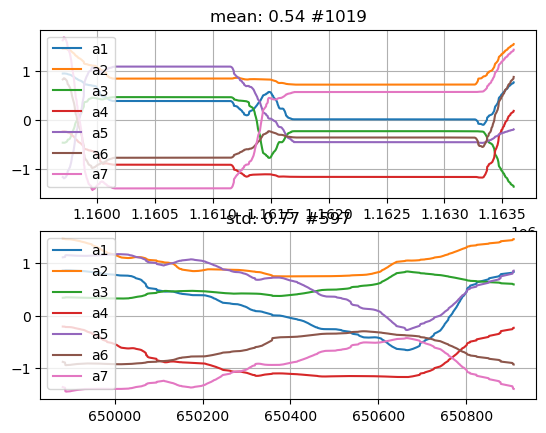

In [854]:
print(min(mvms[0], key=lambda t:t[0]))
print(get_cycle_time(df, min(mvms[0], key=lambda t:t[0])[1]))
print(min(mvms[1], key=lambda t:t[0]))
print(get_cycle_time(df, min(mvms[1], key=lambda t:t[0])[1]))
plt.subplot(211)
plt.plot(df.loc[(df['loop_count']==min(mvms[0], key=lambda t:t[0])[1], df.columns[3:])])
plt.legend(df.columns[3:])
plt.grid()
plt.title('mean: '+str(np.round(min(mvms[0], key=lambda t:t[0])[0],2))+' #'+str(min(mvms[0], key=lambda t:t[0])[1]))
plt.subplot(212)
plt.plot(df.loc[(df['loop_count']==min(mvms[1], key=lambda t:t[0])[1], df.columns[3:])])
plt.legend(df.columns[3:])
plt.grid()
plt.title('std: '+str(np.round(min(mvms[1], key=lambda t:t[0])[0],2))+' #'+str(min(mvms[1], key=lambda t:t[0])[1]))

### Cycle Time

In [855]:
mtc = min_time_cycle(df)

(13.904265, 705)
13.904265


Text(0.5, 1.0, 'cycle time: 13.9s #705')

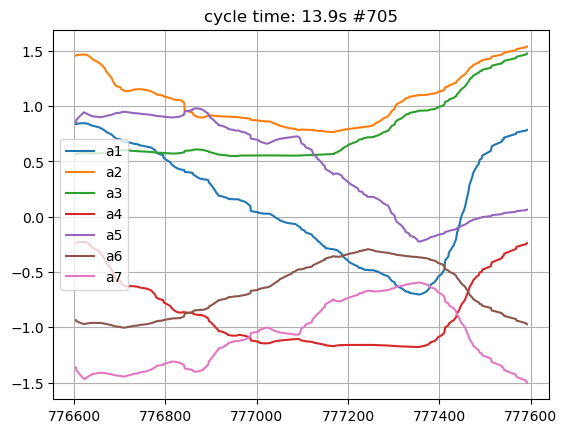

In [856]:
print(min(mtc, key=lambda t:t[0]))
print(get_cycle_time(df, min(mtc, key=lambda t:t[0])[1]))
plt.plot(df.loc[(df['loop_count']==min(mtc, key=lambda t:t[0])[1], df.columns[3:])])
plt.legend(df.columns[3:])
plt.grid()
plt.title('cycle time: '+str(np.round(min(mtc, key=lambda t:t[0])[0],2))+'s #'+str(min(mtc, key=lambda t:t[0])[1]))

### Accumulated Joint Movement

In [857]:
mjm = min_joint_movement(df)

(2210.28434505915, 1047)
14.533848


Text(0.5, 1.0, 'minimum acc joint movement: 2210.28 #1047')

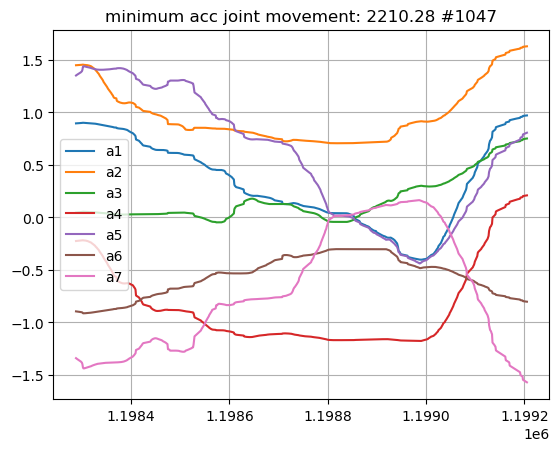

In [858]:
print(min(mjm, key=lambda t:t[0]))
print(get_cycle_time(df, min(mjm, key=lambda t:t[0])[1]))
plt.plot(df.loc[(df['loop_count']==min(mjm, key=lambda t:t[0])[1], df.columns[3:])])
plt.legend(df.columns[3:])
plt.grid()
plt.title('minimum acc joint movement: '+str(np.round(min(mjm, key=lambda t:t[0])[0],2))+' #'+str(min(mjm, key=lambda t:t[0])[1]))

### ToDo

Ansatz Joint Velocity mean und std zu minimieren ergibt keine geringen Zykluszeiten. <br>
**toDo:**
* initial und final joint position vergleichen
* joint positions von cycle time und acc joint movement exportieren
* 10 besten cycle time und acc joint movement vergleichen